In [16]:
# Import required libraries
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

import torchvision
import numpy as np
import torchvision.transforms as transforms
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


In [17]:
# Define hyperparameters
input_size = 784  # 28x28 pixels
hidden_size = 128
num_classes = 10
batch_size = 100

In [18]:
# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

train_dataset = torchvision.datasets.MNIST(root='../data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='../data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


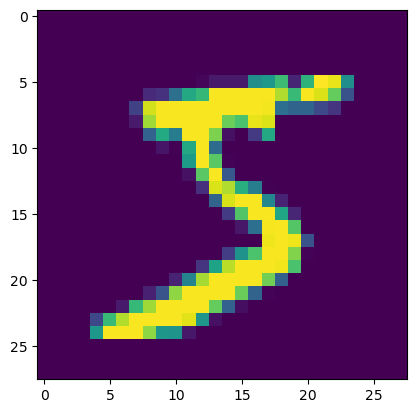

In [79]:
# transpose the array to (28, 28) format expected by Matplotlib
array = np.squeeze(np.transpose(train_dataset[0][0], (1, 2, 0)))

# plot the image using Matplotlib
plt.imshow(array)
plt.show()



In [28]:
next(iter(test_loader))[0].shape

torch.Size([100, 1, 28, 28])

In [19]:
# Define the neural network model
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Create the model
model = NeuralNet(input_size, hidden_size, num_classes)

In [20]:
# Loss function options
cross_entropy_loss = nn.CrossEntropyLoss()
nll_loss = nn.NLLLoss()
mse_loss = nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)



In [21]:
# Function to train the model
def train_model(model, loss_function, train_loader, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, (images, labels) in enumerate(train_loader):
            images = images.reshape(-1, input_size)
            
            # Forward pass
            outputs = model(images)
            
            loss = loss_function(outputs, labels)
            
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')


In [71]:

# Function to evaluate the model
def evaluate_model(model, test_loader):
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.reshape(-1, input_size)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            y_true.extend(labels.numpy())
            y_pred.extend(predicted.numpy())
    
    accuracy, f1, precision, recall = evaluate_model_metrics(np.array(y_true), np.array(y_pred))
    return accuracy, f1, precision, recall

# Function to calculate evaluation metrics
def evaluate_model_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='macro')
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')

    return accuracy, f1, precision, recall

loss_functions = {
    'CrossEntropyLoss': nn.CrossEntropyLoss(),
    'NLLLoss': nn.NLLLoss(),
                 }


In [72]:
# Train and evaluate the model using different loss functions
for loss_name, loss_function in loss_functions.items():
    print(f'Training with {loss_name}:')
    
    # Initialize a new model and optimizer for each loss function
    model = NeuralNet(input_size, hidden_size, num_classes)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    
    # Train the model
    train_model(model, loss_function, train_loader, optimizer, num_epochs=10)

    # Evaluate the model
    accuracy, f1, precision, recall = evaluate_model(model, test_loader)
    print(f'Performance metrics for {loss_name}:')
    print(f'Accuracy: {accuracy:.4f}, F1-score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}\n')


Training with CrossEntropyLoss:
Epoch [1/10], Loss: 0.2818
Epoch [2/10], Loss: 0.1225
Epoch [3/10], Loss: 0.0855
Epoch [4/10], Loss: 0.0642
Epoch [5/10], Loss: 0.0505
Epoch [6/10], Loss: 0.0416
Epoch [7/10], Loss: 0.0344
Epoch [8/10], Loss: 0.0277
Epoch [9/10], Loss: 0.0236
Epoch [10/10], Loss: 0.0199
Performance metrics for CrossEntropyLoss:
Accuracy: 0.9791, F1-score: 0.9789, Precision: 0.9791, Recall: 0.9788

Training with NLLLoss:
Epoch [1/10], Loss: -11815.9167
Epoch [2/10], Loss: -85372.2743
Epoch [3/10], Loss: -223515.6176
Epoch [4/10], Loss: -414722.8688
Epoch [5/10], Loss: -651873.4858
Epoch [6/10], Loss: -930244.1056
Epoch [7/10], Loss: -1246753.6220
Epoch [8/10], Loss: -1599551.9187
Epoch [9/10], Loss: -1987402.2794
Epoch [10/10], Loss: -2409405.8650
Performance metrics for NLLLoss:
Accuracy: 0.1135, F1-score: 0.0204, Precision: 0.0114, Recall: 0.1000



/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
